In [ ]:
from notebooks import *
sg.init(None)  # Computes search_recs, if cache miss

In [ ]:
search_recs = sg.search_recs

xc_id species                                               spectro_disp quality       date month_day    time                                     type     subspecies                                                                     background_species                                       license         recordist bird_seen playback_used elevation                                                                        place                                                                                                                                                                                                  remarks                                                                                                                                                                                                     feat                                                                                                                                                                                                  f_preds
0  122631    NOFL  df_cell_display(value=<IPython.core.display.HTML object>)       B 2013-02-23     02-23   12:07                                     song                                                                                                    []  //creativecommons.org/licenses/by-nc-sa/3.0/  Thomas G. Graves       yes            no      50 m       Coon Creek Trail, Montana de Oro State Park, California, United States                                                                                                                                                                                                           [0.021943718, -0.013880303, -0.02474131, -0.029249227, -0.0022009697, 0.005197683, -0.0013611347, 0.08380525, 0.12334717, -0.12326889, -0.08298812, 0.28920412, 0.3372229, -0.15073681, 0.30699342, ...  [0.0024713662, 0.0094224755, 4.781419e-06, 3.1452785e-06, 0.00074462045, 0.00030162532, 5.1123898e-05, 0.00063944585, 1.8972763e-05, 0.00010812828, 0.0027284152, 4.372679e-05, 0.00024843297, 0.025...
1   57036    NOFL  df_cell_display(value=<IPython.core.display.HTML object>)       B 2008-05-12     05-12  8:30am                                     call        auratus                                                                                     []  //creativecommons.org/licenses/by-nc-sa/3.0/       Mike Nelson       yes            no     100 m                                          Knoxville, Tennessee, United States                                                                                                                                                                                                           [0.05464738, -0.0072838943, 0.06487201, -0.05304652, -0.03116776, -0.03491382, 0.025239846, -0.027527709, 0.13144137, -0.13798659, 0.009089151, -0.048140272, 0.024620118, -0.10654455, -0.33520705,...  [0.00585402, 0.025524829, 8.0870024e-07, 1.4851729e-05, 0.0016455364, 7.4604764e-06, 0.00042171177, 0.0005112346, 3.0140838e-05, 0.0032303908, 7.0413036e-05, 0.00026815897, 0.0008445019, 0.0112649...
2  122615    NOFL  df_cell_display(value=<IPython.core.display.HTML object>)       B 2013-02-23     02-23   11:36                                     song                                                                                                    []  //creativecommons.org/licenses/by-nc-sa/3.0/  Thomas G. Graves       yes            no      50 m       Coon Creek Trail, Montana de Oro State Park, California, United States                                                                                                                                                                                                           [-0.035074785, -0.021986844, -0.04793235, -0.055709522, -0.10181261, -0.017454382, 0.025225349, 0.042370737, 0.068780385, 0.07354527, -0.008713049, 0.016157256, 0.13859469, 0.010384688, -0.0881391...  [0.00066552655, 0.0048430613, 9.054689e-06, 5.6693996e-05, 0.000
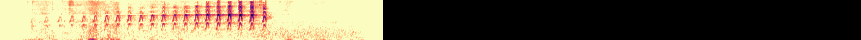
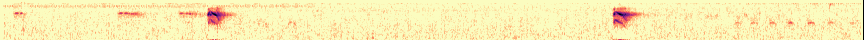
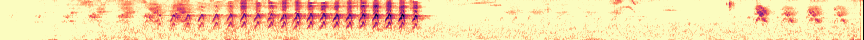
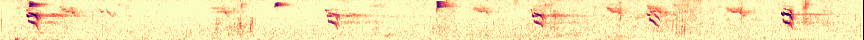
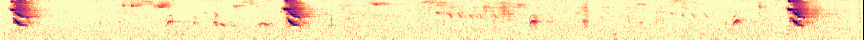
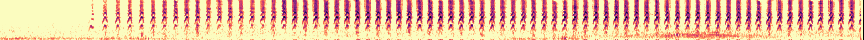
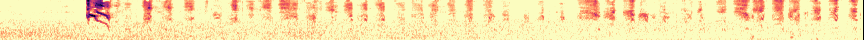
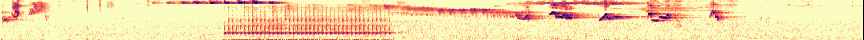
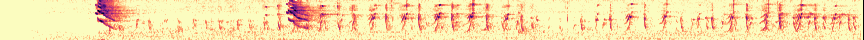
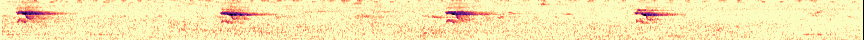

In [ ]:
recs = (search_recs
    # Filter
    [lambda df: df.species == 'NOFL']
    [lambda df: df.quality.isin(['A', 'B'])]
    # .sample(50, random_state=0)
    .reset_index(drop=True)
    # View
    .pipe(recs_featurize_spectro_disp)
    .pipe(recs_view_cols, append=['feat', 'f_preds'])
)
display(
    recs[:10],
)

In [ ]:
X = AttrDict(
    feat    = np.array(list(recs.feat)),
    f_preds = np.array(list(recs.f_preds)),
)
display(valmap(lambda x: x.shape, X))

{'feat': (162, 1500), 'f_preds': (162, 331)}

In [ ]:
# Fit agglom
agglom = sk.cluster.AgglomerativeClustering(
    n_clusters=3,
)
agglom.fit(X.f_preds
    [:10]
)
# limit = 5
limit = None
display(
    'n_components_', agglom.n_components_,
    'n_leaves_',     agglom.n_leaves_,
    'labels_',       agglom.labels_[:limit], np.arange(len(agglom.labels_[:limit])),
    # 'i_labels_',     dict(enumerate(agglom.labels_[:limit])),
    'children',      agglom.children_[:limit],
)

'n_components_'

1

'n_leaves_'

10

'labels_'

array([2, 0, 2, 0, 0, 2, 0, 0, 1, 0])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

'children'

array([[ 7,  9],
       [ 4,  6],
       [ 2,  5],
       [ 1,  3],
       [10, 11],
       [ 0, 12],
       [13, 14],
       [15, 16],
       [ 8, 17]])

'Z'

array([[ 7.,  9.,  0., nan],
       [ 4.,  6.,  1., nan],
       [ 2.,  5.,  2., nan],
       [ 1.,  3.,  3., nan],
       [10., 11.,  4., nan],
       [ 0., 12.,  5., nan],
       [13., 14.,  6., nan],
       [15., 16.,  7., nan],
       [ 8., 17.,  8., nan]])

'leaf_order'

[8, 0, 2, 5, 1, 3, 7, 9, 4, 6]

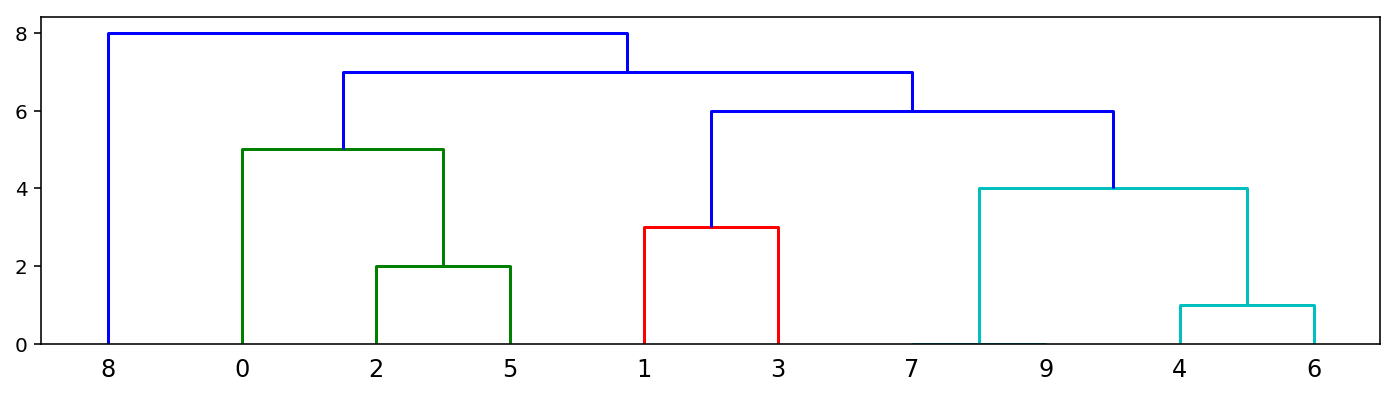

In [ ]:
# Hierarchical sort / get dendrogram leaves / plot (scipy) dendrogram from (sk) agglom
children = agglom.children_
dists = np.arange(len(children))  # Mock (uniform) distances between each pair of children
n_obs = [None] * len(children)  # Mock num obs in each cluster's subtree
Z = np.array(dtype=float, object=[
    *children.T,
    dists,
    n_obs,
]).T
display('Z', Z)
dendro = scipy.cluster.hierarchy.dendrogram(Z,
    # no_plot=True,
)
leaf_order = dendro['leaves']
display('leaf_order', leaf_order)

In [ ]:
# Fit kmeans
kmeans = sk.cluster.KMeans(
    n_clusters=5,
    # verbose=1,  # Noisy
    # n_jobs=-1,  # Slower, probably because of proc overhead
)
timed_print(lambda: (
    kmeans.fit(X.feat)
))
display(dict(
    n_iter_          = kmeans.n_iter_,
    inertia_         = kmeans.inertia_,
    cluster_centers_ = kmeans.cluster_centers_.shape,
    labels_          = kmeans.labels_,
))

[00:00.093]

{
  'n_iter_': 8,
  'inertia_': numpy.float64(202060.48076708082),
  'cluster_centers_': (5, 1500),
  'labels_': array([0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 4, 4, 1, 0, 1, 1, 4, 4, 1, 1, 4, 0, 1, 1, 2, 2, 1, 1, 1, 0, 0, 0, 2, 1,
       4, 4, 1, 0, 1, 1, 3, 4, 1, 1, 4, 2, 1, 4, 2, 1, 2, 4, 0, 1, 1, 0, 1, 0, 0, 1, 2, 2, 1, 0, 0, 3, 2, 1, 1, 3, 0,
       2, 4, 0, 1, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 4, 1, 0, 4, 4, 1, 2, 0, 1, 1, 1, 1, 1, 4, 1, 0, 1, 0, 2, 1, 3, 0, 1,
       1, 2, 1, 2, 4, 0, 1, 0, 0, 4, 1, 0, 0, 4, 4, 2, 1, 0, 1, 4, 2, 1, 1, 0, 0, 4, 3, 1, 4, 1, 4, 4, 4, 1, 2, 1, 4,
       1, 1, 2, 2, 4, 1, 1, 0, 2, 0, 1, 2, 4, 2], dtype=int32)
}

In [ ]:
def fit_dbscan(X, show=True, **fit):
    dbscan = sk.cluster.DBSCAN(
        **fit,
    )
    timed_print(lambda: (
        dbscan.fit(X)
    ))
    if show:
        display(dict(
            core_sample_indices_ = dbscan.core_sample_indices_,
            components_          = dbscan.components_.shape,
            labels_              = dbscan.labels_,
        ))
    return dbscan

dbscan = fit_dbscan(
    X.feat,
    eps=50,  # (Default: .5)
    # min_samples=5,
    metric='euclidean',
    # n_jobs=-1,  # Slower, probably because of proc overhead
)

[00:00.090]

{
  'core_sample_indices_': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,
        22,  24,  25,  26,  27,  29,  30,  31,  32,  33,  34,  36,  37,  38,  39,  40,  41,  42,  44,  45,  46,  47,
        48,  49,  50,  52,  53,  54,  56,  57,  58,  59,  60,  61,  62,  63,  65,  66,  67,  70,  71,  73,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  85,  86,  87,  88,  89,  90,  91,  92,  93,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 109, 110, 111, 113, 114, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       127, 128, 129, 130, 132, 133, 134, 135, 138, 140, 141, 142, 143, 144, 146, 148, 149, 150, 152, 153, 154, 155,
       157, 158, 160]),
  'components_': (135, 1500),
  'labels_': array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  

In [ ]:

def cluster_label_and_dist(df, cluster, f_col, d_compute, show=False) -> Tuple['label', 'dist_to_center']:

    X = np.array(list(df[f_col]))  # Series[np.ndarray[p]] -> np.ndarray[n,p]
    cluster.fit(X)

    if show:
        ipy_print({
            k: eval(f'cluster.{k}')
            for k in [
                # kmeans
                'n_iter_',
                'inertia_',
                'cluster_centers_.shape',
                'labels_',
                # dbscan
                'core_sample_indices_',
                'components_.shape',
                'labels_',
            ]
            if hasattr(cluster, k.split('.')[0])
        })

    # TODO Coherent to d_compute here, e.g. for kmeans which doesn't use d_compute in fit?
    return [
        (label, np.asscalar(d_compute([x], [cluster.cluster_centers_[label]])))
        for x, label in zip(df[f_col], cluster.labels_)
    ]

In [ ]:

# api params
dists = '2c'
dists = list(dists)

# TODO Problematic that we don't d_compute here?
cluster = sk.cluster.KMeans(
    n_clusters=5,
    # verbose=1,  # Noisy
    # n_jobs=-1,  # Slower, probably because of proc overhead
)

# TODO Compute cluster centroid as mean of its core samples
#   - TODO Figure out usable eps (finicky)
# cluster = sk.cluster.DBSCAN(
#     metric=d_compute,
#     eps=100,  # (Default: .5)
#     # min_samples=5,
#     # n_jobs=-1,  # Slower, probably because of proc overhead
# )

(recs

    # TODO TODO -> .pipe(recs_cluster, cluster='k', dists=dists)
    .pipe(lambda df: df_assign_first(df, **{  # (.pipe to avoid error-prone lambda scoping inside dict comp)
        k: cluster_label_and_dist(df, cluster, f_col, d_compute)
        for f_col, f, _f_compute in sg.feat_info
        for d, d_compute in dist_info.items()
        if d in dists
        for k in [f'c_{f}{d}']
    }))

    .sort_values('c_pc')
    # [:10]
)